# Costa Rica Institute of Technology
* Course: MP-6122 Pattern Recognition
* Student: Jose Martinez Hdez
* Course: Data Science 
* Year: 2022
* Notebook 2: Supervised Learning Models

# Importing Data

In [818]:
# Importing libaries 
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split   

## Classification Data

In [819]:
df = pd.read_csv('dataset/breast-cancer-wisconsin.data')
df.columns = ['code_number', 'Clump_Thickness','Uniformity_of_Cell_Size' ,'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
              'Single_Epithelial_Cell_Size',  'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli' ,'Mitoses','Class']
df.head()

,code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [820]:
df = df.replace('?', np.nan)
df.dropna(inplace=True)

In [821]:
df.Class = df.Class.map({2: 0, 4:1})

<AxesSubplot:>

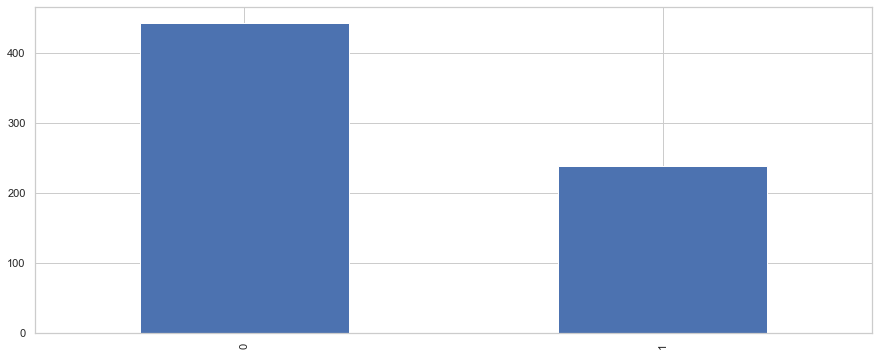

In [822]:
df.Class.value_counts().plot.bar()

In [823]:
X = df.drop(['code_number','Class'],axis=1).values
Y = df.Class.values

In [824]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
df.Class.unique()

array([0, 1], dtype=int64)

## Regression Data

In [825]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('dataset/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [826]:
column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = data.loc[:,column_sels]
y = data['MEDV']

In [827]:
min_max_scaler = MinMaxScaler()
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# Models

## Linear Regression (Regression)

### Conceptual Explanation 

Linear Regression is the supervised machine learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

<img src="images/linear.png" width=400 height=400 />

### Mathematical 

From basic linear algebra, we should remember that the linear regression model is a linear combination of the independent variables, that is described by the following equation: 

$y = b_0 + b_1 \cdot x$

Where $b_0$ is the intercept and $b_1$ is the slope.

So, the main idea of linear regression is to find the best fit line between the independent and dependent variables. This can be done by finding the value of the slope ($b_1$) and the intercept ($b_0$) in the linear equation that reduces the error between a predicted value from the model and the actual value from the data. 

We create a hipotetic model by using the following equation:

$h(x) = b_0 + b_1 \cdot x$

And then we calculate the error between the actual value and the predicted value by using the following cost equation of the squared error:

$J(b_0, b_1) = \frac{1}{2m} \sum_{1=n}^{i=1} (h(x_n) - y_n)^2$

### Optimal Applications 

This model has the following assumptions and limitations: 

1. *Linearity*: The relationship between the dependent and independent variables is linear.
2. *Homoscedasticity*: The error is homoscedastic. The variance of the error terms should be constant i.e the spread of residuals should be constant for all values of X. This assumption can be checked by plotting a residual plot. If the assumption is violated then the points will form a funnel shape otherwise they will be constant.
3. *Independence*:  The variables should be independent of each other i.e no correlation should be there between the independent variables.
4. *Normality*: The $x$ and $y$ variables should be normally distributed.

Basically, this model will work well when the assumptions are satisfied. The violation of the assumptions leads to a decrease in the accuracy of the model therefore the predictions are not accurate and error is also high.

**References**: 

- https://towardsdatascience.com/ensemble-models-5a62d4f4cb0chttps://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/#:~:text=In%20the%20most%20simple%20words,the%20dependent%20and%20independent%20variable.
- https://www.youtube.com/watch?v=1-OGRohmH2s
- https://towardsdatascience.com/mathematics-for-machine-learning-linear-regression-least-square-regression-de09cf53757c

In [828]:
# Example of Linear Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x, y)
print(regressor.score(x, y))
print(regressor.coef_)
print(regressor.intercept_)


0.7406426641094095
[ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
  19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
  -8.95582398   3.69282735 -19.01724361]
26.620267584687756


## Logistic Regression (Classification)

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

**References**: 

- *link* 

In [829]:
# Example of Logistic Regression

# Example of Linear Regression
"""
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
print(regressor.score(X_train, y_train))
"""

'\nfrom sklearn.linear_model import LogisticRegression\n\nclassifier = LogisticRegression(random_state=0)\nclassifier.fit(X_train, y_train)\nprint(regressor.score(X_train, y_train))\n'

## Support Vector Machines (Classification)

### Conceptual Explanation 

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

![svm](images/svm.png)

### Mathematical 

$y = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + ... + b_n \cdot x_n $

### Optimal Applications

**References**: 

- https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

In [830]:
# Example of SVM

## Linear Models for multi-class classification (Classification)

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + ... + b_n \cdot x_n $

### Optimal Applications

**References**: 

- *link* 

In [831]:
# Example of Linear Models for multi-class classification
from sklearn.linear_model import LinearRegression

## kNN

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

### kNN for classification

### kNN for regression

**References**: 

- *link* 

In [832]:
# Example of kNN

## Naive Bayes (Classification)

### Conceptual Explanation 

In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features (see Bayes classifier). They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve high accuracy levels.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

**References**: 

- *link* 


In [833]:
# Example of Naive Bayes

## Decision Trees (Classification)

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

**References**: 

- *link* 

In [834]:
# Example of Decision Trees

## Random Forests (Classification)

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

**References**: 

- *link* 

In [835]:
# Example of Random Forest

## Kernel Support Vector Machines (Classification)

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

**References**: 

- *link*

In [836]:
# Example of kernel SVM

# Ensemble Methods

**References**: 

- https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c
- https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

# Simple Ensemble Methods

## Max Voting

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

### Example of the model

**References**: 

- *link* 

## Averaging

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

### Example of the model

**References**: 

- *link* 

## Weighted Average

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

### Example of the model

**References**: 

- *link* 

In [837]:
# Example of simple emsemble methods

# Advanced Ensemble Methods

## Bagging

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

### Example of the model

**References**: 

- *link* 

## Boosting

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

### Example of the model

**References**: 

- *link* 

## Stacking

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

### Example of the model

**References**: 

- *link* 

## Blending

### Conceptual Explanation 

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### Mathematical 

$y = b_0 + b_1 \cdot x$

### Optimal Applications

### Example of the model

**References**: 

- *link* 

In [838]:
# Example of advanced emsemble tecnhiques

# Is it possible to create our own ensemble model? If so, how would it be the approach?

**References**: 

- *link* 

# Metrics

Performance metrics are a part of every machine learning pipeline. They tell you if you’re making progress, and put a number on it. All machine learning models, whether it’s linear regression, or a SOTA technique like BERT, need a metric to judge performance

**References**: 

- https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide
- https://scikit-learn.org/stable/modules/model_evaluation.html

## Classification Metrics

Classification models have discrete output, so we need a metric that compares discrete classes in some form. Classification Metrics evaluate a model’s performance and tell you how good or bad the classification is, but each of them evaluates it in a different way.

The following are the metrics for evaluating classification problems:

- Accuracy
- Balanced Accuracy
- Top k Accuracy
- Average Precision
- Brier Score
- F1 Score
- F1 Micro Score
- F1 Macro Score
- F1 Weighted Score
- F1 Sample Score
- Log Loss
- Precision
- Recall
- Jaccard
- Roc Auc
- Roc Auc Overlap
- Roc Auc Under Over

In the following seccion, we will discuss more details of the most common metrics.

### Confusion Matrix

Confusion Matrix is a tabular visualization of the ground-truth labels versus model predictions. Each row of the confusion matrix represents the instances in a predicted class and each column represents the instances in an actual class. Confusion Matrix is not exactly a performance metric but sort of a basis on which other metrics evaluate the results. One example of a confusion matrix is the following image:

![confusion](images/confusion.png)

The confusion matrix is made up of the following elements:

- **True Positives**: Number of correct predictions of the positive class.
- **True Negatives**: Number of correct predictions of the negative class.
- **False Positives**: Number of incorrect predictions of the positive class.
- **False Negatives**: Number of incorrect predictions of the negative class.

The idea is to try minimize the **False Positives** and **False Negatives**, since these are the ones that are most likely to be misclassified.

### Accuracy

Classification accuracy is perhaps the simplest metric to use and implement and is defined as the number of correct predictions divided by the total number of predictions, multiplied by 100.

This metric is described with the following equation:

$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$ 

### Precision

There are many cases in which classification accuracy is not a good indicator of your model performance. One of these scenarios is when your class distribution is imbalanced (one class is more frequent than others). In this case, even if you predict all samples as the most frequent class you would get a high accuracy rate, which does not make sense at all (because your model is not learning anything, and is just predicting everything as the top class). Precision is the ratio of true positives and total positives predicted. 

This metric is described with the following equation:

$Precision = \frac{TP}{TP+FP}$ 

### Recall

Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model.

This metric is described with the following equation:

$Recall = \frac{TP}{TP+FN}$ 

### F1

Depending on application, you may want to give higher priority to recall or precision. But there are many applications in which both recall and precision are important. Therefore, it is natural to think of a way to combine these two into a single metric. One popular metric which combines precision and recall is called F1-score, which is the harmonic mean of precision and recall.

This metric is described with the following equation:

$F1 = \frac{1}{\frac{1}{Precision} + \frac{1}{Recall}}$ 

### Receiver Operating Curve (ROC) 

The receiver operating characteristic curve is plot which shows the performance of a binary classifier as function of its cut-off threshold. It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for various threshold values.

One example of a ROC curve is the following image:

![roc](images/roc.png)

### Area Under the Curve (AUC)

The area under the curve (AUC), is an aggregated measure of performance of a binary classifier on all possible threshold values (and therefore it is threshold invariant). AUC calculates the area under the ROC curve, and therefore it is between 0 and 1. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

One example of a AUC curve is the following image:

![auc](images/auc.png)

**References**: 

- https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide#:~:text=Classification%20models%20have%20discrete%20output,it%20in%20a%20different%20way.
- https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b
- https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce

In [839]:
# Simple Example of Classification Metrics
# Notebook from: https://app.neptune.ai/theaayushbajaj/sandbox/n/f884bbea-5263-4aeb-aa35-18d74b2835b9/41813125-2b9d-4332-b73f-f07c3b977372

from sklearn.svm import SVC

# Train a model
clf = SVC(
        C=1.0,
        kernel='rbf',
        degree=3,
        gamma='scale',
        coef0=0.0,
        shrinking=True,
        probability=False,
        tol=0.001,
        cache_size=200,
        class_weight=None,
        verbose=False,
        max_iter=-1,
        decision_function_shape='ovr',
        break_ties=False,
        random_state=None
    )

clf.fit(X_train,y_train)

y_hat = clf.predict(X_test)

In [840]:
from sklearn.metrics import accuracy_score

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test,y_hat)}')

Accuracy Score is 0.9635036496350365


In [841]:
from sklearn.metrics import precision_score
# Precision
precision = precision_score(y_test, y_hat)
print('Precision: %f' % precision)

Precision: 0.959184


In [842]:
from sklearn.metrics import recall_score
# Recall
recall = recall_score(y_test, y_hat)
print('Recall: %f' % recall)

Recall: 0.940000


In [843]:
from sklearn.metrics import f1_score
# F1 Score
f1 = f1_score(y_test, y_hat)
print('F1 Score: %f' % f1)

F1 Score: 0.949495


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.96')

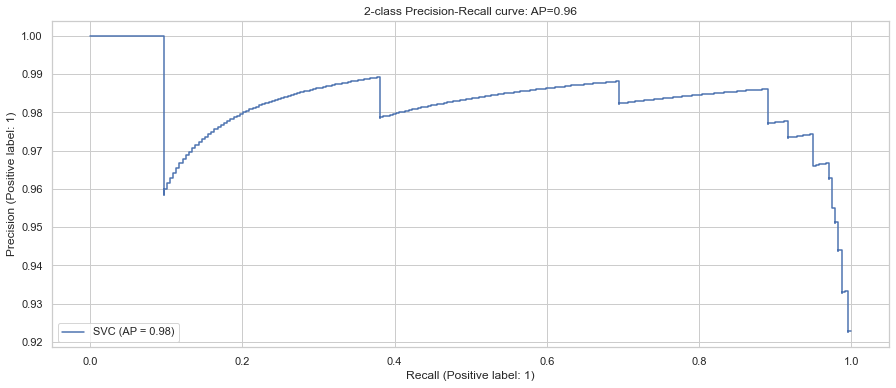

In [844]:
from sklearn.metrics import plot_precision_recall_curve

# Plot Precision-Recall Curve
disp = plot_precision_recall_curve(clf, X, Y)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(precision))

In [845]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(Y)])

# calculate scores
ns_auc = roc_auc_score(Y, ns_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y, ns_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (Temp/ipykernel_21984/640381356.py, line 4)

## Regression Metrics

Regression refers to predictive modeling problems that involve predicting a numeric value.

It is different from classification that involves predicting a class label. Unlike classification, you cannot use classification accuracy to evaluate the predictions made by a regression model. Instead, you must use error metrics specifically designed for evaluating predictions made on regression problems and it is most Robust to outliers.

The following are the metrics for evaluating regression problems:

- Max Error
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error
- Mean Squared Logarithmic Error
- Median Absolute Error
- R-Squared
- Explained Variance
- Mean Poisson Deviance
- Mean Gamma Deviance
- Mean Absolute Percentage Error

In the following seccion, we will discuss more details of the most common metrics.

### Mean Absolute Error (MAE)

MAE is a very simple metric which calculates the absolute difference between actual and predicted values. It has the advantage that the MAE you get is in the same unit as the output variable.

In contrast, the disadvantage is that the graph of MAE is not differentiable so we have to apply various optimizers like gradient descent which can be differentiable.

This metric is described with the following equation:

$MAE = \frac{1}{n} \sum_{1=n}^{i=1} \left|h(x_n) - y_n\right|$

### Mean Squared Error (MSE)

It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE. MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

So, above we are finding the absolute difference and here we are finding the squared difference. The graph of MSE is differentiable, so you can easily use it as a loss function.

It has the disadvantage that the value you get after calculating MSE is a squared unit of output. For example, the output variable is in meter (m) then after calculating MSE the output we get is in meter squared and if the data has outliers t then it penalizes the outliers most and the calculated MSE is bigger. So, in short, it is not robust to outliers which were an advantage in MAE.

This metric is described with the following equation:

$MSE = \frac{1}{n} \sum_{1=n}^{i=1} \left(h(x_n) - y_n\right)^2$

### Root Mean Squared Error (RMSE)

As RMSE is clear by the name itself, that it is a simple square root of mean squared error. It has the advantage that the output value you get is in the same unit as the required output variable which makes interpretation of loss easy, but it is not that robust to outliers as compared to MAE.

This metric is described with the following equation:

$RMSE = \sqrt{\frac{1}{n} \sum_{1=n}^{i=1} \left(h(x_n) - y_n\right)^2}$

### Root Mean Squared Logarithmic Error (RMSLE)

Taking the $\log$ of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale. To control this situation of RMSE we take the $\log$  of calculated RMSE error and resultant we get as RMSLE.

This metric is described with the following equation:

$RMSLE = \sqrt{\frac{1}{n} \sum_{1=n}^{i=1} \left( \log \left(h(x_n) + 1\right) - \log \left( y_n + 1 \right) \right)^2}$

### R Squared ($R^2$)

$R^2$ score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform. In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.

So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. The same we have in classification problems which we call a threshold which is fixed at 0.5. So basically R2 squared calculates how must regression line is better than a mean line.

This metric is described with the following equation:

$R^2 = 1 - \frac{RSS}{TSS}$ 

Where RSS is the Residual Sum of Squares and TSS is the Total Sum of Squares. They are described with the following formulas:

$RSS =  \sum_{1=n}^{i=1} \left(h(x_n) - y_n\right)^2$ 

$TSS =  \sum_{1=n}^{i=1} \left(h(x_n) - \overline{y}\right)^2 $ 

### Adjusted R Squared

The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect. Hence, To control this situation adjusted R Squared came into existence.

This metric is described with the following equation:

$R^2_a = 1 - \left| \left( \frac{n-1}{n-k-1}\right) \times  \left(1 - R2\right) \right|$ 

Where $k$ is the number of independent variables, $n$ is the number of observations, and $R^2$ is the R squared value.

**References**: 

- https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce
- https://machinelearningmastery.com/regression-metrics-for-machine-learning/
- https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

In [ ]:
# Simple Example of Regression Metrics
# Notebook from: https://app.neptune.ai/theaayushbajaj/sandbox/n/f884bbea-5263-4aeb-aa35-18d74b2835b9/41813125-2b9d-4332-b73f-f07c3b977372
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x, y)
y_hat = regressor.predict(x)

In [ ]:
mae = np.abs(y-y_hat)

print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

MAE: 3.27 (+/- 3.35)


In [ ]:
mse = (y-y_hat)**2

print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

MSE: 21.89 (+/- 59.14)


In [ ]:
mse = (y-y_hat)**2

rmse = np.sqrt(mse.mean())

print(f"RMSE: {rmse:0.2f}")

RMSE: 4.68


In [ ]:
# R^2 coefficient of determination
SE_line = sum((y-y_hat)**2)
SE_mean = sum((y-y.mean())**2)

r2 = 1-(SE_line/SE_mean)

print(f"R^2 coefficient of determination: {r2*100:0.2f}%")

R^2 coefficient of determination: 74.06%
